In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
folder_paths =["../snakemake-workflow/output/weight_loss/all_chloroplast.100/cmon_name_annot/",
              "../snakemake-workflow/output/weight_loss/all_chloroplast.1000/cmon_name_annot",
              "../snakemake-workflow/output/weight_loss/crop_chloroplast.100/cmon_name_annot/",
              "../snakemake-workflow/output/weight_loss/crop_chloroplast.1000/cmon_name_annot/",
              "../snakemake-workflow/output/weight_loss/trnl.1/cmon_name_annot/"
              ]
dataframes = []

In [4]:
for folder_path in folder_paths:
    print(f"{folder_path}")
    files = os.listdir(folder_path)
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            dataframes.append(df)
final_df = pd.concat(dataframes, ignore_index=True)

../snakemake-workflow/output/weight_loss/all_chloroplast.100/cmon_name_annot/
../snakemake-workflow/output/weight_loss/all_chloroplast.1000/cmon_name_annot
../snakemake-workflow/output/weight_loss/crop_chloroplast.100/cmon_name_annot/
../snakemake-workflow/output/weight_loss/crop_chloroplast.1000/cmon_name_annot/
../snakemake-workflow/output/weight_loss/trnl.1/cmon_name_annot/


In [5]:
db_key_dict = {'db.crop-plant-entrez.ref.1000.sig.zip': 'crop_chloroplast', 
                'db.plant-entrez-ref.1000.sig.zip': 'all_chloroplast', 
                'db.crop-plant-entrez.ref.100.sig.zip': 'crop_chloroplast', 
                'db.plant-entrez-ref.100.sig.zip': 'all_chloroplast', 
                'db.trnL-entrez-ref.fasta.bz2.sig': 'trnl_1'}

In [6]:
final_df.shape

(19484, 42)

In [7]:
final_df.groupby('filename').size()

filename
../db/Sketched-db/db.trnL-entrez-ref.fasta.bz2.sig                                       6073
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.crop-plant-entrez.ref.100.sig.zip     2559
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.crop-plant-entrez.ref.1000.sig.zip     476
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.plant-entrez-ref.100.sig.zip          9124
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.plant-entrez-ref.1000.sig.zip         1252
dtype: int64

In [8]:
final_df.columns

Index(['intersect_bp', 'f_orig_query', 'f_match', 'f_unique_to_query',
       'f_unique_weighted', 'average_abund', 'median_abund', 'std_abund',
       'filename', 'name', 'md5', 'f_match_orig', 'unique_intersect_bp',
       'gather_result_rank', 'remaining_bp', 'query_filename', 'query_name',
       'query_md5', 'query_bp', 'ksize', 'moltype', 'scaled', 'query_n_hashes',
       'query_abundance', 'query_containment_ani', 'match_containment_ani',
       'average_containment_ani', 'max_containment_ani',
       'potential_false_negative', 'n_unique_weighted_found',
       'sum_weighted_found', 'total_weighted_hashes', 'scientific_name',
       'Unnamed: 0_x', 'USDA_id', 'usda_common_name', 'Unnamed: 0_y',
       'trnL_id', 'trnl_common_name', 'Unnamed: 0', 'foodb_id',
       'foodb_common_name'],
      dtype='object')

In [9]:
def db_shorthand(filename):
    return db_key_dict[filename.split('/')[-1]]

In [10]:
final_df['filename'].value_counts()

/home/sjnair/2023-dietary-plants/db/Sketched-db/db.plant-entrez-ref.100.sig.zip          9124
../db/Sketched-db/db.trnL-entrez-ref.fasta.bz2.sig                                       6073
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.crop-plant-entrez.ref.100.sig.zip     2559
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.plant-entrez-ref.1000.sig.zip         1252
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.crop-plant-entrez.ref.1000.sig.zip     476
Name: filename, dtype: int64

In [11]:
final_df['db'] = final_df['filename'].apply(db_shorthand)

In [12]:
final_df['db'].unique()

array(['all_chloroplast', 'crop_chloroplast', 'trnl_1'], dtype=object)

In [13]:
def cmon_name_col(df): # combines the 3 sources into one column. Priority given to USDA first.
    priority_order =['usda_common_name','trnl_common_name','foodb_common_name']
    df['common_name'] = df['usda_common_name']
    for column in priority_order[1:]:
        df['common_name'] = df['common_name'].combine_first(df[column])

In [14]:
cmon_name_col(final_df)

In [15]:
final_df['usda_common_name'].value_counts()

velvet bean              162
avocado                   99
rough lemon               96
oysternut                 90
tea                       86
                        ... 
California fan palm        1
buzzy lizzy                1
alligatorweed              1
narrowleaf goldshower      1
pygmy waterlily            1
Name: usda_common_name, Length: 592, dtype: int64

In [16]:
final_df['common_name'].value_counts()

velvet bean          162
avocado               99
rough lemon           96
oysternut             90
tea                   86
                    ... 
Brazilian vervain      1
dragontree             1
flame bottletree       1
fuchsia begonia        1
meadow ryegrass        1
Name: common_name, Length: 671, dtype: int64

## chart making

In [17]:
final_df.columns

Index(['intersect_bp', 'f_orig_query', 'f_match', 'f_unique_to_query',
       'f_unique_weighted', 'average_abund', 'median_abund', 'std_abund',
       'filename', 'name', 'md5', 'f_match_orig', 'unique_intersect_bp',
       'gather_result_rank', 'remaining_bp', 'query_filename', 'query_name',
       'query_md5', 'query_bp', 'ksize', 'moltype', 'scaled', 'query_n_hashes',
       'query_abundance', 'query_containment_ani', 'match_containment_ani',
       'average_containment_ani', 'max_containment_ani',
       'potential_false_negative', 'n_unique_weighted_found',
       'sum_weighted_found', 'total_weighted_hashes', 'scientific_name',
       'Unnamed: 0_x', 'USDA_id', 'usda_common_name', 'Unnamed: 0_y',
       'trnL_id', 'trnl_common_name', 'Unnamed: 0', 'foodb_id',
       'foodb_common_name', 'db', 'common_name'],
      dtype='object')

In [18]:
grouped = final_df.groupby(['query_name', 'ksize', 'scaled','db']).size().reset_index(name='match_count')

In [19]:
grouped_2 = final_df.dropna(subset=['common_name'], inplace=False).groupby(['query_name', 'ksize', 'scaled','db']).size().reset_index(name='common_name_match_count')

In [20]:
grouped

,query_name,ksize,scaled,db,match_count
0,ERR11520689,21,100,all_chloroplast,130
1,ERR11520689,21,100,crop_chloroplast,27
2,ERR11520689,21,100,trnl_1,66
3,ERR11520689,21,1000,all_chloroplast,18
4,ERR11520689,21,1000,crop_chloroplast,6
...,...,...,...,...,...
593,ERR11520728,51,100,all_chloroplast,27
594,ERR11520728,51,100,crop_chloroplast,15
595,ERR11520728,51,100,trnl_1,27
596,ERR11520728,51,1000,all_chloroplast,7


In [21]:
grouped_2

,query_name,ksize,scaled,db,common_name_match_count
0,ERR11520689,21,100,all_chloroplast,36
1,ERR11520689,21,100,crop_chloroplast,26
2,ERR11520689,21,100,trnl_1,20
3,ERR11520689,21,1000,all_chloroplast,4
4,ERR11520689,21,1000,crop_chloroplast,6
...,...,...,...,...,...
578,ERR11520728,51,100,all_chloroplast,11
579,ERR11520728,51,100,crop_chloroplast,15
580,ERR11520728,51,100,trnl_1,10
581,ERR11520728,51,1000,all_chloroplast,4


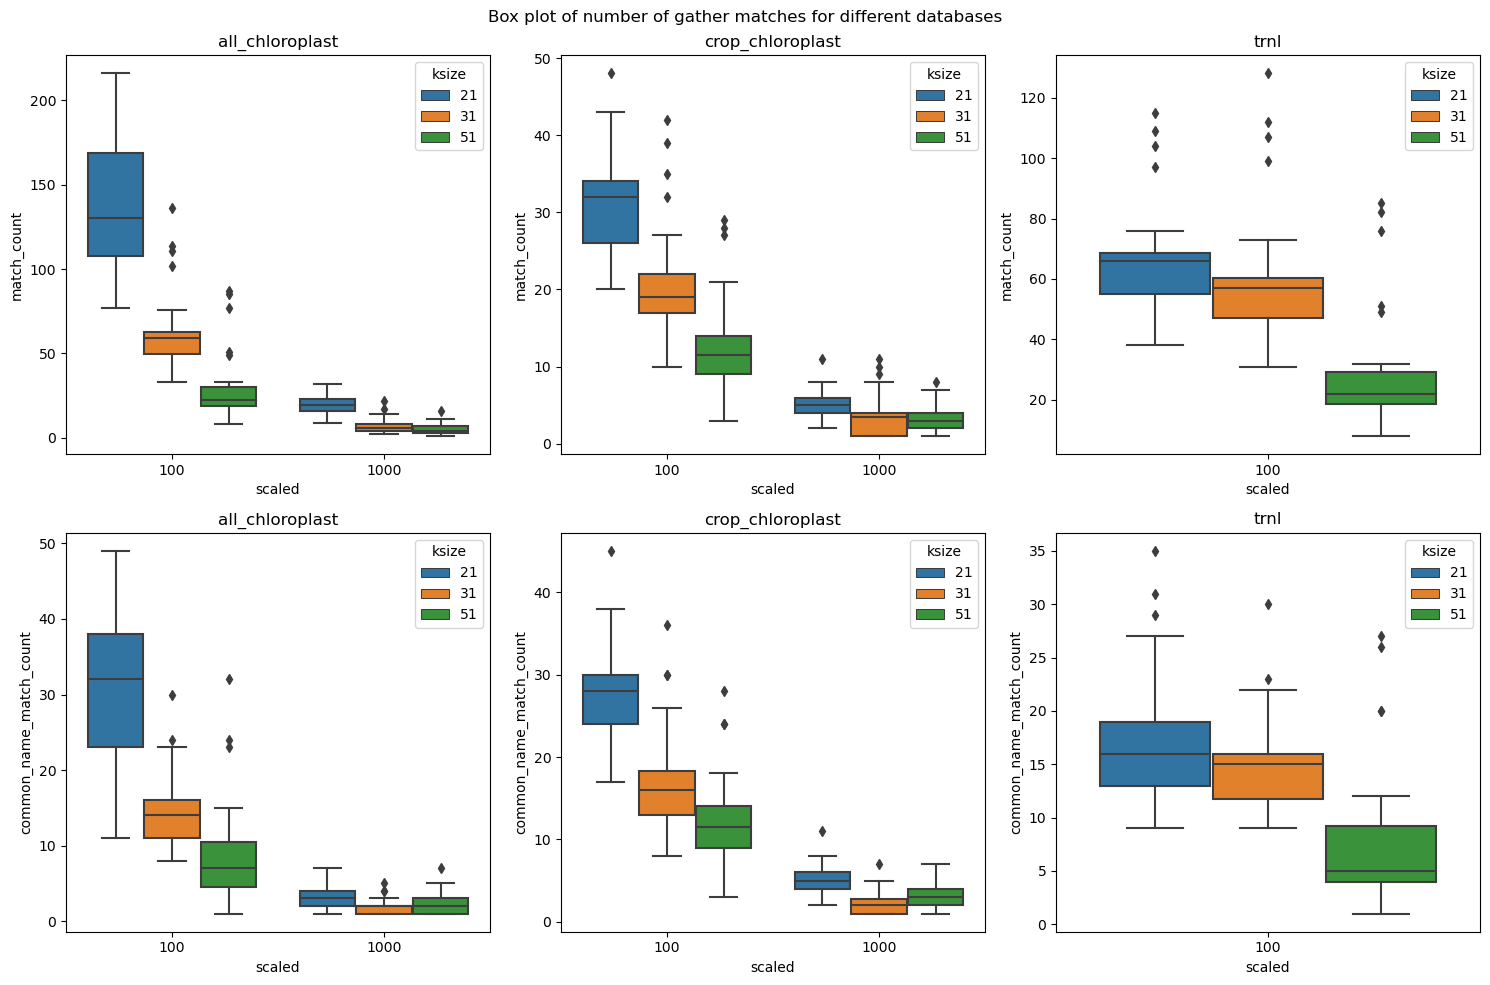

In [22]:


# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot the first box plot
sns.boxplot(x='scaled', y='match_count', hue='ksize', data=grouped[grouped['db'] == 'all_chloroplast'], ax=axes[0,0])
axes[0,0].set_title('all_chloroplast')

# Plot the second box plot
sns.boxplot(x='scaled', y='match_count', hue='ksize', data=grouped[grouped['db'] == 'crop_chloroplast'], ax=axes[0,1])
axes[0,1].set_title('crop_chloroplast')

# Plot the third box plot
sns.boxplot(x='scaled', y='match_count', hue='ksize', data=grouped[grouped['db'] == 'trnl_1'], ax=axes[0,2])
axes[0,2].set_title('trnl')


# Plot the first box plot
sns.boxplot(x='scaled', y='common_name_match_count', hue='ksize', data=grouped_2[grouped_2['db'] == 'all_chloroplast'], ax=axes[1,0])
axes[1,0].set_title('all_chloroplast')

# Plot the second box plot
sns.boxplot(x='scaled', y='common_name_match_count', hue='ksize', data=grouped_2[grouped_2['db'] == 'crop_chloroplast'], ax=axes[1,1])
axes[1,1].set_title('crop_chloroplast')

# Plot the third box plot
sns.boxplot(x='scaled', y='common_name_match_count', hue='ksize', data=grouped_2[grouped_2['db'] == 'trnl_1'], ax=axes[1,2])
axes[1,2].set_title('trnl')

# Adjust layout and show the plots
plt.suptitle("Box plot of number of gather matches for different databases")
plt.tight_layout()
plt.show()


Summary stats

In [23]:
final_df.groupby(['db','scaled','ksize']).size()

db                scaled  ksize
all_chloroplast   100     21       5564
                          31       2438
                          51       1122
                  1000    21        781
                          31        271
                          51        200
crop_chloroplast  100     21       1245
                          31        819
                          51        495
                  1000    21        213
                          31        136
                          51        127
trnl_1            100     21       2637
                          31       2333
                          51       1103
dtype: int64

In [24]:
final_df[final_df['db']=='all_chloroplast']['common_name'].value_counts()[:15]

velvet bean             79
locoto                  49
oysternut               41
multibloom hoarypea     38
chirauli nut            36
sponge gourd            36
theobroma               36
avocado                 33
herb bennet             33
coyote tobacco          33
cultivated cockscomb    32
jiang guo xian          31
snakegourd              29
splitlip hempnettle     29
American shoreweed      29
Name: common_name, dtype: int64

In [28]:
# params
cond1 = final_df['db']=='crop_chloroplast'
cond2= final_df['scaled']==100
cond3 =final_df['ksize']==51

final_df[cond1 & cond2 & cond3]['common_name'].value_counts()[:40]

coriander              34
avocado                33
rocoto                 31
Indian lettuce         30
apple                  30
Amur grape             27
timothy                27
velvet bean            26
tea                    24
kidney bean            21
theobroma              15
cinnamon               15
edible banana          12
rough lemon            11
pistachio nut          11
sweet osmanthus         9
muscadine               9
red clover              8
Barbados shrub          8
rambutan                6
bignay                  6
crookneck squash        5
garden asparagus        5
common jujube           5
chia                    5
breadfruit              5
English walnut          4
sorghum                 4
sunset-hibiscus         4
jungle rice             3
common reed             3
black medick            3
white lupine            3
cherry plum             3
Japanese raisintree     3
common tansy            2
European chestnut       2
Vera cruz pepper        2
syzygium    